# Final analysis of Chosen pair of models: NN+ucnsd-BERT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import validation_curve
from sklearn.metrics import ConfusionMatrixDisplay
from ast import literal_eval

In [2]:
train_data = pd.read_csv('train_data-CLEANED-7.csv', sep = ';', converters={"embeddings_uncsd-BERT": literal_eval}, dtype={'affil_index': 'int32'})
train_data.drop(columns = ['Unnamed: 0'], inplace = True)
train_data

,part,labels,affil_index,embeddings_csd-BERT,embeddings_uncsd-BERT,embeddings_uncsd-BERT-1024,embeddings_Doc2Vec-enwiki,embeddings_Doc2Vec-apnews,embeddings_IS-GloVe,embeddings_IS-FastText,embeddings_USE,embeddings_MiniLM-6,embeddings_MiniLM-12
0,Department of Infectious Diseases,None,0,"[-0.7451534271240234, 0.47369468212127686, 0.9...","[-0.9760083556175232, -0.6990846991539001, -0....","[-0.9936661124229431, -0.9937924742698669, 0.9...","[-0.0006624317611567676, -0.000624399748630821...","[-0.0006624317611567676, -0.000624399748630821...","[0.07127083092927933, 0.16852135956287384, 0.0...","[0.007468888536095619, -0.08546485751867294, 0...","[0.05208278074860573, 0.05196858197450638, 0.0...","[-0.04159573093056679, 0.011807174421846867, -...","[-0.03141885623335838, -0.005746397189795971, ..."
1,Molecular Virology,None,0,"[-0.7110623717308044, 0.4193134307861328, 0.99...","[-0.9385858774185181, -0.5305934548377991, -0....","[-0.9353844523429871, -0.8880748748779297, 0.9...","[-0.0014015781925991178, -0.001260015065781772...","[-0.0014015781925991178, -0.001260015065781772...","[0.05405030399560928, 0.17692118883132935, -0....","[0.007468888536095619, -0.09259368479251862, 0...","[0.04545605927705765, 0.02571406401693821, 0.0...","[-0.03922281414270401, -0.0401160791516304, -0...","[-0.06689699739217758, -0.03697143495082855, -..."
2,Heidelberg University,Institution,0,"[-0.7138798236846924, 0.3940200209617615, 0.99...","[-0.8486786484718323, -0.2455383986234665, 0.4...","[-0.8594508767127991, -0.8380329608917236, 0.9...","[-0.0006516524590551853, -0.001572769018821418...","[-0.0006516524590551853, -0.001572769018821418...","[0.04793785512447357, 0.11302205175161362, -0....","[0.007468888536095619, -0.1303471326828003, 0....","[0.025743847712874413, 0.07257843762636185, -0...","[-0.019170325249433517, 0.03432709351181984, -...","[0.034776169806718826, 0.08649962395429611, -0..."
3,Im Neuenheimer Feld 345,None,0,"[-0.7371072769165039, 0.4671095013618469, 0.99...","[-0.8885483145713806, -0.38439667224884033, -0...","[-0.9990481734275818, -0.983550488948822, 0.99...","[0.001873101806268096, -0.01634991355240345, -...","[-0.01626664213836193, -0.11745397746562958, -...","[0.0009204352390952408, 0.0840580016374588, -0...","[0.007468888536095619, 0.021465899422764778, 0...","[-0.00863810908049345, 0.021668508648872375, -...","[-0.004936551209539175, 0.032334957271814346, ...","[-0.0154262138530612, 0.041678693145513535, -0..."
4,69120 Heidelberg,City,0,"[-0.6838078498840332, 0.43467605113983154, 0.9...","[-0.8710287809371948, -0.18979620933532715, 0....","[-0.13470880687236786, -0.4623102843761444, -0...","[0.0016177125507965684, 0.000449529878096655, ...","[0.0016177125507965684, 0.000449529878096655, ...","[0.04793785884976387, -0.019109880551695824, -...","[0.007468888536095619, -0.1303471475839615, 0....","[0.031027894467115402, 0.0562385655939579, -0....","[-0.044027894735336304, 0.038785725831985474, ...","[-0.004203577060252428, 0.06125829741358757, -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,India.,Country,600,"[-0.8424339890480042, 0.6388465166091919, 0.99...","[-0.9591183066368103, -0.44601452350616455, -0...","[-0.9472164511680603, -0.9264965653419495, 0.9...","[-0.0007508505368605256, -0.000230572666623629...","[-0.0007508505368605256, -0.000230572666623629...","[0.09974408149719238, -0.06908119469881058, 0....","[0.007468888536095619, -0.1127246543765068, -0...","[-0.013274550437927246, 0.047691818326711655, ...","[0.0469152070581913, 0.03491903468966484, -0.0...","[0.010092565789818764, -0.007286895532160997, ..."
2993,caprotec bioanalytics GmbH,Institution,601,"[-0.8602685928344727, 0.610092043876648, 0.999...","[-0.8730614185333252, -0.4671713709831238, -0....","[-0.96100914478302, -0.9261451363563538, 0.995...","[-0.0016056945314630866, 0.0005506016314029694...","[-0.0016056945314630866, 0.0005506016314029694...","[0.04509479179978371, -0.0022186520509421825, ...","[0.007468888536095619, -0.

In [3]:
test_data = pd.read_csv('test_data-CLEANED-7.csv', sep = ';', converters={"embeddings_uncsd-BERT": literal_eval}, dtype={'affil_index': 'int32'})
test_data.drop(columns = ['Unnamed: 0'], inplace = True)
test_data

,part,labels,affil_index,embeddings_csd-BERT,embeddings_uncsd-BERT,embeddings_uncsd-BERT-1024,embeddings_Doc2Vec-enwiki,embeddings_Doc2Vec-apnews,embeddings_IS-GloVe,embeddings_IS-FastText,embeddings_USE,embeddings_MiniLM-6,embeddings_MiniLM-12
0,Aventis Pharma,Institution,0,"[-0.6225269436836243, 0.41175007820129395, 0.9...","[-0.7495080828666687, 0.10450626909732819, 0.8...","[-0.9385257363319397, -0.8636099100112915, 0.9...","[0.001125917537137866, -0.00017105128790717572...","[0.001125917537137866, -0.00017105128790717572...","[0.016122661530971527, -0.03915251046419144, -...","[0.007468888536095619, -0.11853469163179398, -...","[-0.00012825796147808433, -0.05241379141807556...","[-0.0465744286775589, 0.009636870585381985, -0...","[-0.1666678935289383, -0.013364685699343681, -..."
1,Romainville,City,0,"[-0.7443768978118896, 0.37689119577407837, 0.9...","[-0.9179261922836304, -0.47461554408073425, -0...","[-0.9338648915290833, -0.8978722095489502, 0.9...","[-0.0005519804544746876, 0.0012614359147846699...","[-0.0005519804544746876, 0.0012614359147846699...","[-0.01049832720309496, -0.08939896523952484, -...","[0.007468889933079481, -0.14438317716121674, -...","[-0.07343265414237976, 0.05264187231659889, 0....","[-0.02654253877699375, 0.0026296894066035748, ...","[-0.026327263563871384, 0.0074079884216189384,..."
2,France. christophe.dini@aventis.com,Country,0,"[-0.7713785767555237, 0.44986480474472046, 0.9...","[-0.8849691152572632, -0.5707671642303467, -0....","[-0.925447940826416, -0.9710708260536194, 0.99...","[-0.0009261688101105392, 0.0001335361012024805...","[-0.0009261688101105392, 0.0001335361012024805...","[0.11357733607292175, -0.03367322310805321, 0....","[0.007468888536095619, -0.07494887709617615, 0...","[0.008010601624846458, -0.026512829586863518, ...","[-0.028896013274788857, 0.0297868475317955, 0....","[-0.028765931725502014, 0.03430818021297455, -..."
3,Jiangsu Key Laboratory of Drug Design and Opti...,Institution,1,"[-0.615035891532898, 0.31155872344970703, 0.99...","[-0.9479542970657349, -0.6653308272361755, -0....","[-0.9993273019790649, -0.998293399810791, 0.99...","[-0.0010953565360978246, 4.938078564009629e-05...","[-0.0011839469661936164, -0.001301796175539493...","[0.12751629948616028, 0.1880914717912674, 0.01...","[0.007468888536095619, -0.10749538987874985, 0...","[0.00240126415155828, 0.024633796885609627, 0....","[-0.0047662584111094475, 0.009459470398724079,...","[-0.06418686360120773, 0.07573624700307846, -0..."
4,China Pharmaceutical University,Institution,1,"[-0.738187313079834, 0.46809735894203186, 0.99...","[-0.9523708820343018, -0.5192119479179382, -0....","[-0.9705463647842407, -0.9841862916946411, 0.9...","[0.001557248760946095, -0.0008196939597837627,...","[0.001557248760946095, -0.0008196939597837627,...","[0.13147854804992676, 0.17797352373600006, -0....","[0.007468888536095619, -0.11864248663187027, 0...","[-0.01415878813713789, 0.03882789611816406, 0....","[-0.04689796641469002, 0.016873467713594437, -...","[-0.03835853934288025, 0.05853106454014778, -0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,People's Republic of China.,Country,58,"[-0.7836729288101196, 0.5700669884681702, 0.99...","[-0.9732127785682678, -0.5987682938575745, -0....","[-0.8492422699928284, -0.9690293669700623, 0.9...","[-0.0007051564170978963, 0.0002351854054722935...","[-0.0007051564170978963, 0.0002351854054722935...","[0.14862169325351715, 0.12809833884239197, -0....","[0.007468888536095619, -0.09598811715841293, 0...","[-0.036199189722537994, -0.021052345633506775,...","[-0.017312729731202126, 0.0585881844162941, 0....","[-0.024359749630093575, 0.05095865949988365, -..."
312,National Center for Natural Products Research,Institution,59,"[-0.6381785273551941, 0.46710556745529175, 0.9...","[-0.9274004697799683, -0.2877633571624756, -0....","[-0.9930930137634277, -0.9795610904693604, 0.9...","[-0.0015818303218111396, 0.0003046033380087465...","[-0.0015818303218111396, 0.0003046033380087465..

In [4]:
X = train_data.loc[:, "embeddings_uncsd-BERT"].to_list()
y = train_data.loc[:, "labels"].tolist()

X_test = test_data.loc[:, "embeddings_uncsd-BERT"].to_list()
y_test = test_data.loc[:, "labels"].tolist()

c:\Users\janna\miniconda3\envs\wordvec\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\janna\miniconda3\envs\wordvec\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (51) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\janna\miniconda3\envs\wordvec\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\janna\miniconda3\envs\wordvec\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (151) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\janna\mini

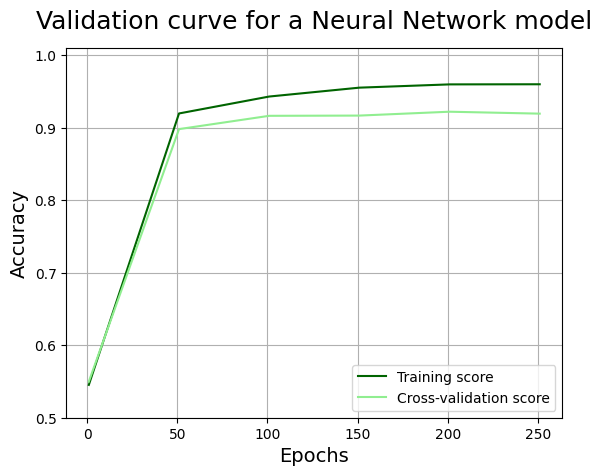

c:\Users\janna\miniconda3\envs\wordvec\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\janna\miniconda3\envs\wordvec\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (51) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\janna\miniconda3\envs\wordvec\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\janna\miniconda3\envs\wordvec\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (151) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\janna\mini

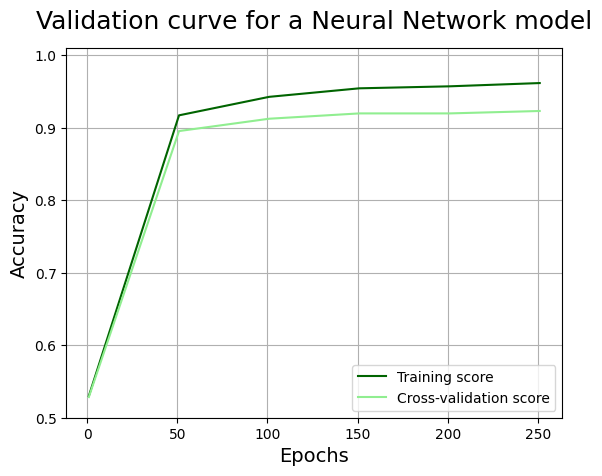

c:\Users\janna\miniconda3\envs\wordvec\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\janna\miniconda3\envs\wordvec\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (51) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\janna\miniconda3\envs\wordvec\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\janna\miniconda3\envs\wordvec\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\janna\minico

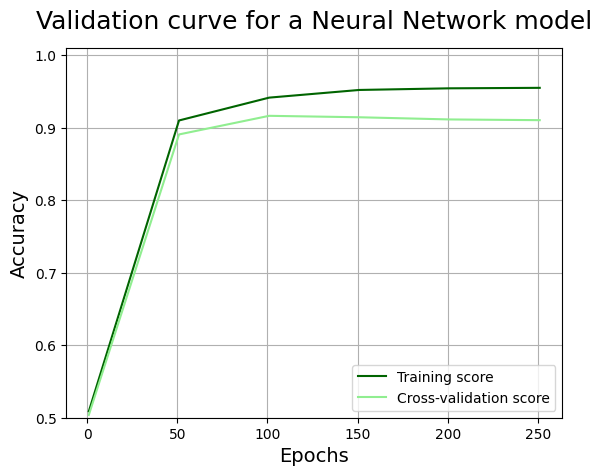

c:\Users\janna\miniconda3\envs\wordvec\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\janna\miniconda3\envs\wordvec\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (51) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\janna\miniconda3\envs\wordvec\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\janna\miniconda3\envs\wordvec\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (151) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\janna\mini

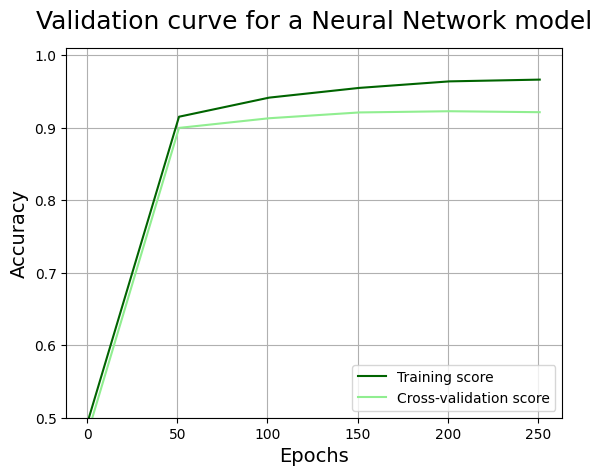

c:\Users\janna\miniconda3\envs\wordvec\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\janna\miniconda3\envs\wordvec\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (51) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\janna\miniconda3\envs\wordvec\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\janna\miniconda3\envs\wordvec\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (151) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\janna\mini

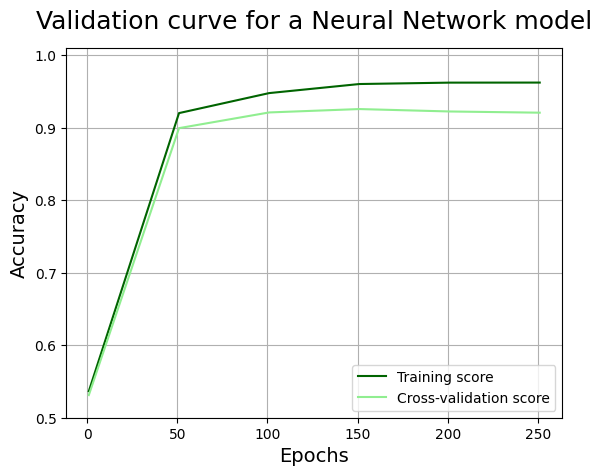

In [5]:
epochs = 300
k = 0
for rs in [1, 2, 3, 4, 42]:
        # MLPClassifier curve of learning related to epochs
        clf = MLPClassifier(random_state=rs)
        train_scores, test_scores = validation_curve(clf, X, y, param_name="max_iter", param_range=np.arange(1, epochs, 50), cv=5, scoring="accuracy")
        train_scores_mean = np.mean(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        plt.plot(np.arange(1, epochs, 50), train_scores_mean, label='Training score', color='darkgreen')
        plt.plot(np.arange(1, epochs, 50), test_scores_mean, label='Cross-validation score', color = 'lightgreen')
        plt.ylabel('Accuracy', fontsize=14)
        plt.xlabel('Epochs', fontsize=14)
        plt.title('Validation curve for a Neural Network model', fontsize=18, y=1.03)
        plt.legend()
        plt.ylim(0.5, 1.01)
        plt.grid(True)
        plt.savefig('3-validation_curve-epochs-{}.png'.format(k))
        plt.show()
        k += 1

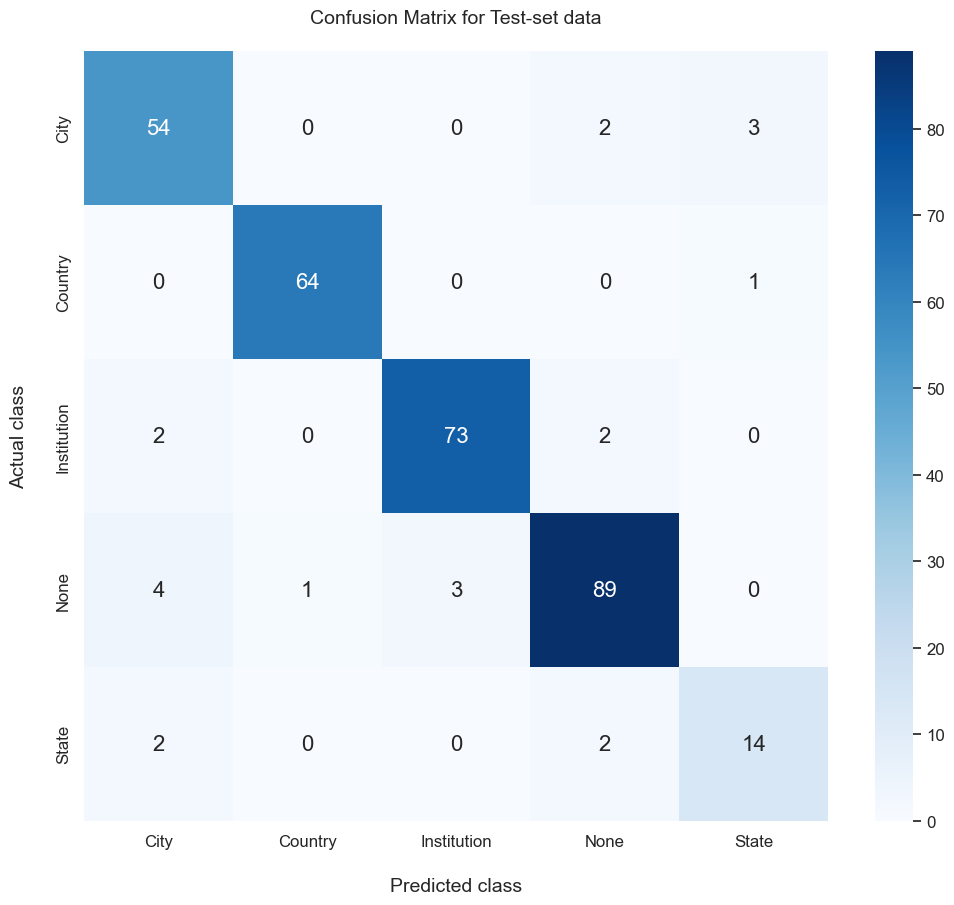

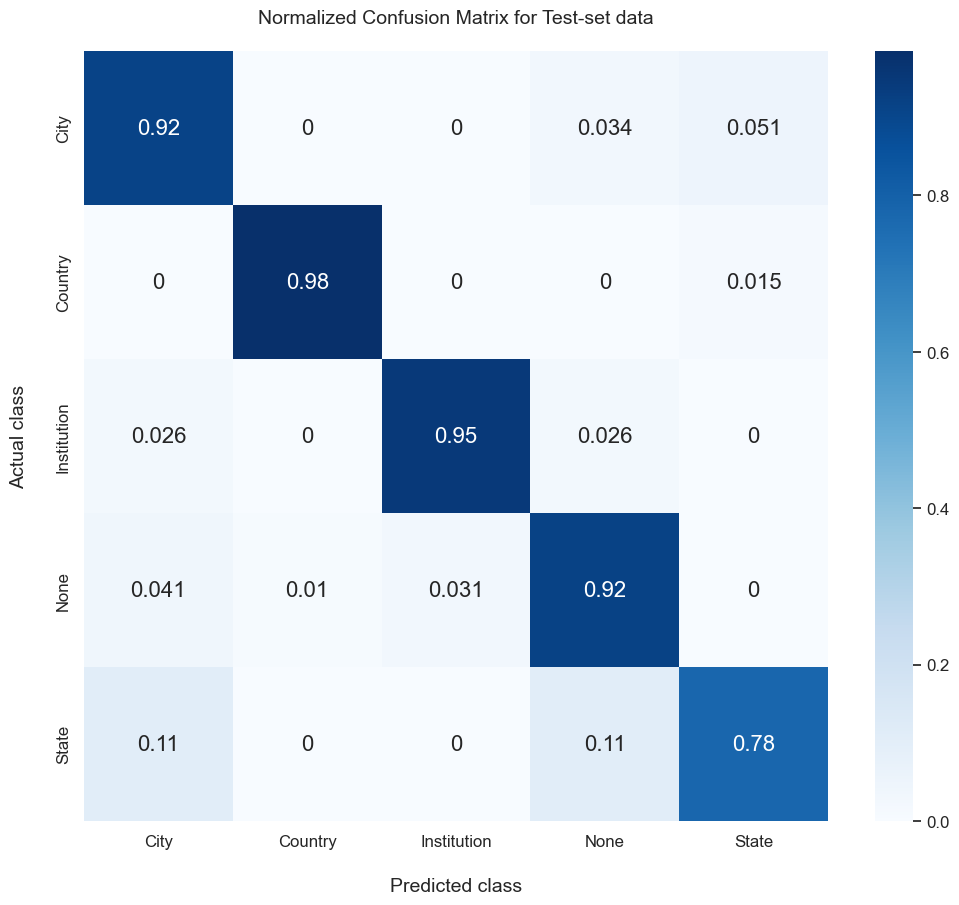

In [18]:
#confusion matrix for test data 
clf.fit(X, y)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
#disp.plot()


plt.figure(figsize=(12, 10), dpi=100)
sns.set(font_scale = 1.1)

ax = sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", annot_kws={"size": 16})

ax.set_xlabel("Predicted class", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(clf.classes_)

ax.set_ylabel("Actual class", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(clf.classes_)

ax.set_title("Confusion Matrix for Test-set data", fontsize=14, pad=20)
plt.savefig('3-confusion_matrix-test-set.png')
plt.show()

#confusion matrix for test data - percentage

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_, normalize='true')
plt.figure(figsize=(12, 10), dpi=100)
sns.set(font_scale = 1.1)

ax = sns.heatmap(cm, annot=True, cmap="Blues", annot_kws={"size": 16})

ax.set_xlabel("Predicted class", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(clf.classes_)

ax.set_ylabel("Actual class", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(clf.classes_)

ax.set_title("Normalized Confusion Matrix for Test-set data", fontsize=14, pad=20)
plt.savefig('3-confusion_matrix-test-set-normalized.png')
plt.show()



In [13]:
#calculate accuracy, precision, recall, f1-score
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        City       0.87      0.92      0.89        59
     Country       0.98      0.98      0.98        65
 Institution       0.96      0.95      0.95        77
        None       0.94      0.92      0.93        97
       State       0.78      0.78      0.78        18

    accuracy                           0.93       316
   macro avg       0.91      0.91      0.91       316
weighted avg       0.93      0.93      0.93       316

